In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../artifacts/raw/data.csv")

In [3]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  \
0  2024-01-01 00:00:00          39           Idle      74.137590   
1  2024-01-01 00:01:00          29         Active      84.264558   
2  2024-01-01 00:02:00          15         Active      44.280102   
3  2024-01-01 00:03:00          43         Active      40.568502   
4  2024-01-01 00:04:00           8           Idle      75.063817   

   Vibration_Hz  Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0      3.500595              8.612162           10.650542       0.207764   
1      3.355928              2.268559           29.111810       2.228464   
2      2.079766              6.144105           18.357292       1.639416   
3      0.298238              4.067825           29.153629       1.161021   
4      0.345810              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                      0.344650     14.965470               Low  
1                      0.769848      7.678270               Low  
2                      0.987086      8.198391               Low  
3                      0.983390      2.740847            Medium  
4                      0.573117     12.100686               Low

In [4]:
df.shape

(100000, 13)

In [5]:
df.columns

Index(['Timestamp', 'Machine_ID', 'Operation_Mode', 'Temperature_C',
       'Vibration_Hz', 'Power_Consumption_kW', 'Network_Latency_ms',
       'Packet_Loss_%', 'Quality_Control_Defect_Rate_%',
       'Production_Speed_units_per_hr', 'Predictive_Maintenance_Score',
       'Error_Rate_%', 'Efficiency_Status'],
      dtype='object')

In [6]:
df['Operation_Mode'].value_counts()

Operation_Mode
Active         70054
Idle           20057
Maintenance     9889
Name: count, dtype: int64

In [7]:
df['Efficiency_Status'].value_counts()

Efficiency_Status
Low       77825
Medium    19189
High       2986
Name: count, dtype: int64

In [8]:
df['Machine_ID'].value_counts()

Machine_ID
23    2092
36    2085
45    2080
30    2074
17    2061
26    2059
48    2058
38    2058
44    2054
21    2052
28    2048
29    2044
5     2043
2     2041
13    2040
18    2031
22    2031
32    2031
15    2027
10    2022
42    2019
41    2013
16    2010
4     2004
19    2004
3     2001
47    2001
40    2001
25    1998
39    1993
9     1991
24    1984
20    1970
8     1967
7     1965
37    1964
27    1957
33    1956
12    1955
11    1951
49    1950
34    1948
14    1941
6     1934
31    1933
1     1916
35    1913
50    1912
46    1912
43    1906
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Timestamp                      100000 non-null  object 
 1   Machine_ID                     100000 non-null  int64  
 2   Operation_Mode                 100000 non-null  object 
 3   Temperature_C                  100000 non-null  float64
 4   Vibration_Hz                   100000 non-null  float64
 5   Power_Consumption_kW           100000 non-null  float64
 6   Network_Latency_ms             100000 non-null  float64
 7   Packet_Loss_%                  100000 non-null  float64
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64
 9   Production_Speed_units_per_hr  100000 non-null  float64
 10  Predictive_Maintenance_Score   100000 non-null  float64
 11  Error_Rate_%                   100000 non-null  float64
 12  Efficiency_Status              

### Data Processing

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],errors='coerce')

In [11]:
df['Timestamp']

0       2024-01-01 00:00:00
1       2024-01-01 00:01:00
2       2024-01-01 00:02:00
3       2024-01-01 00:03:00
4       2024-01-01 00:04:00
                ...        
99995   2024-03-10 10:35:00
99996   2024-03-10 10:36:00
99997   2024-03-10 10:37:00
99998   2024-03-10 10:38:00
99999   2024-03-10 10:39:00
Name: Timestamp, Length: 100000, dtype: datetime64[ns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Timestamp                      100000 non-null  datetime64[ns]
 1   Machine_ID                     100000 non-null  int64         
 2   Operation_Mode                 100000 non-null  object        
 3   Temperature_C                  100000 non-null  float64       
 4   Vibration_Hz                   100000 non-null  float64       
 5   Power_Consumption_kW           100000 non-null  float64       
 6   Network_Latency_ms             100000 non-null  float64       
 7   Packet_Loss_%                  100000 non-null  float64       
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64       
 9   Production_Speed_units_per_hr  100000 non-null  float64       
 10  Predictive_Maintenance_Score   100000 non-null  float64       
 11  E

In [13]:
df.isna().sum()

Timestamp                        0
Machine_ID                       0
Operation_Mode                   0
Temperature_C                    0
Vibration_Hz                     0
Power_Consumption_kW             0
Network_Latency_ms               0
Packet_Loss_%                    0
Quality_Control_Defect_Rate_%    0
Production_Speed_units_per_hr    0
Predictive_Maintenance_Score     0
Error_Rate_%                     0
Efficiency_Status                0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
categorical_cols = ['Operation_Mode','Efficiency_Status']

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Timestamp                      100000 non-null  datetime64[ns]
 1   Machine_ID                     100000 non-null  int64         
 2   Operation_Mode                 100000 non-null  category      
 3   Temperature_C                  100000 non-null  float64       
 4   Vibration_Hz                   100000 non-null  float64       
 5   Power_Consumption_kW           100000 non-null  float64       
 6   Network_Latency_ms             100000 non-null  float64       
 7   Packet_Loss_%                  100000 non-null  float64       
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64       
 9   Production_Speed_units_per_hr  100000 non-null  float64       
 10  Predictive_Maintenance_Score   100000 non-null  float64       
 11  E

### EDA

In [17]:
numeric_cols =df.select_dtypes(include=[np.number]).columns.tolist()

In [18]:
numeric_cols

['Machine_ID',
 'Temperature_C',
 'Vibration_Hz',
 'Power_Consumption_kW',
 'Network_Latency_ms',
 'Packet_Loss_%',
 'Quality_Control_Defect_Rate_%',
 'Production_Speed_units_per_hr',
 'Predictive_Maintenance_Score',
 'Error_Rate_%']

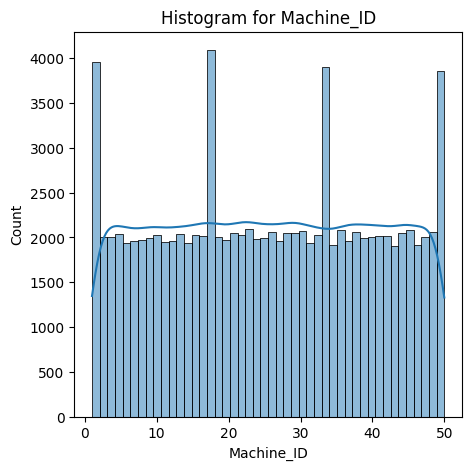

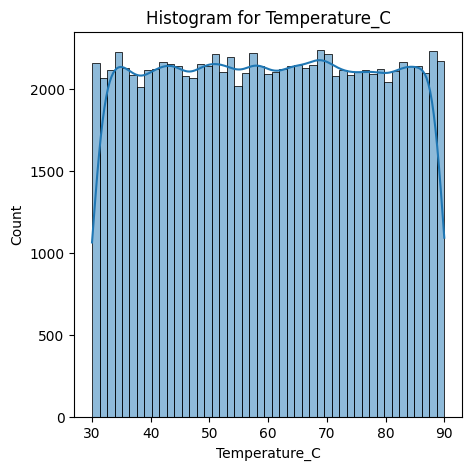

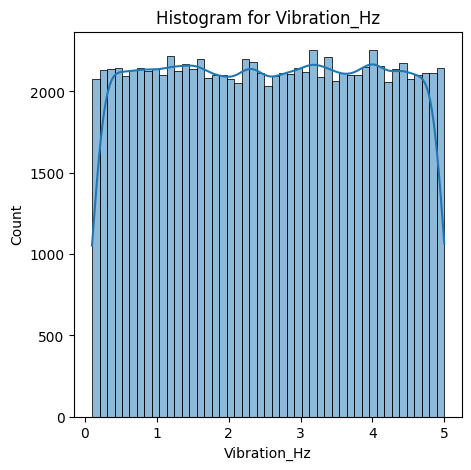

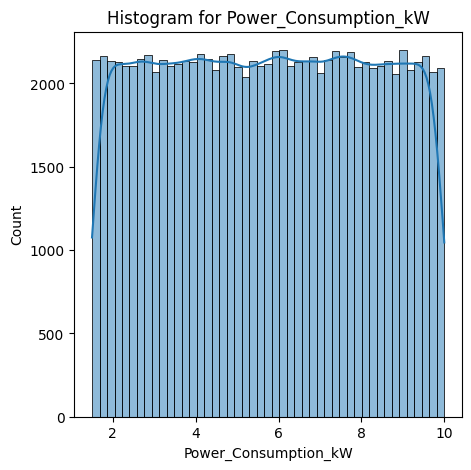

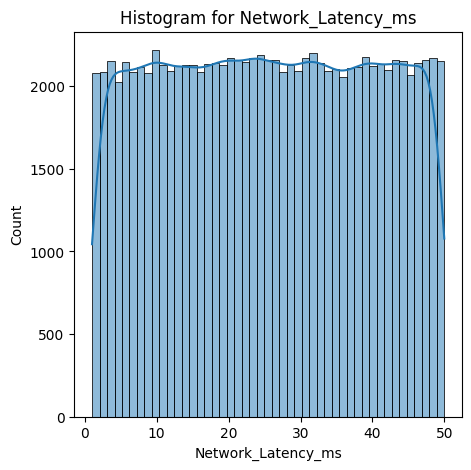

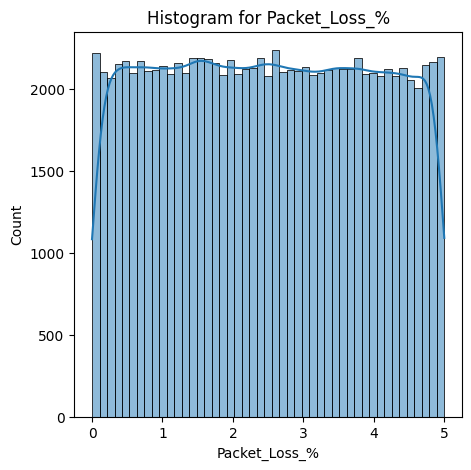

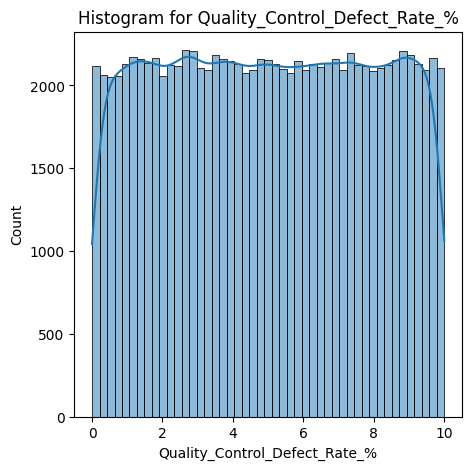

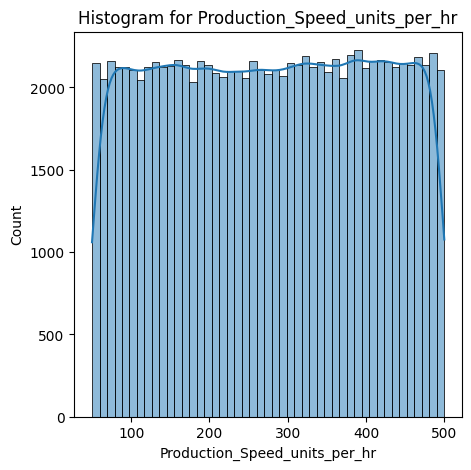

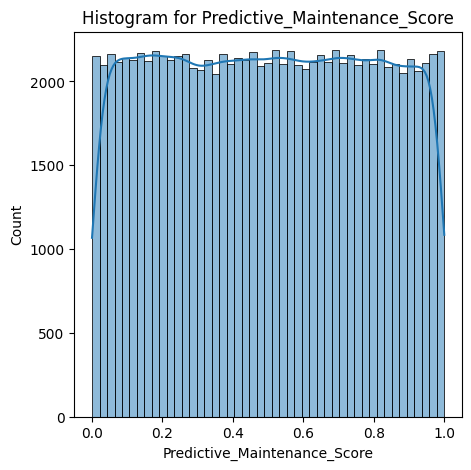

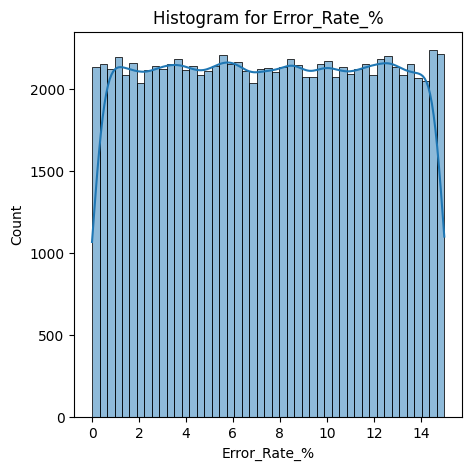

In [19]:
for col in numeric_cols:
    plt.figure(figsize=(5,5))
    sns.histplot(df[col],kde=True)
    plt.title(f"Histogram for {col}")
    plt.show()

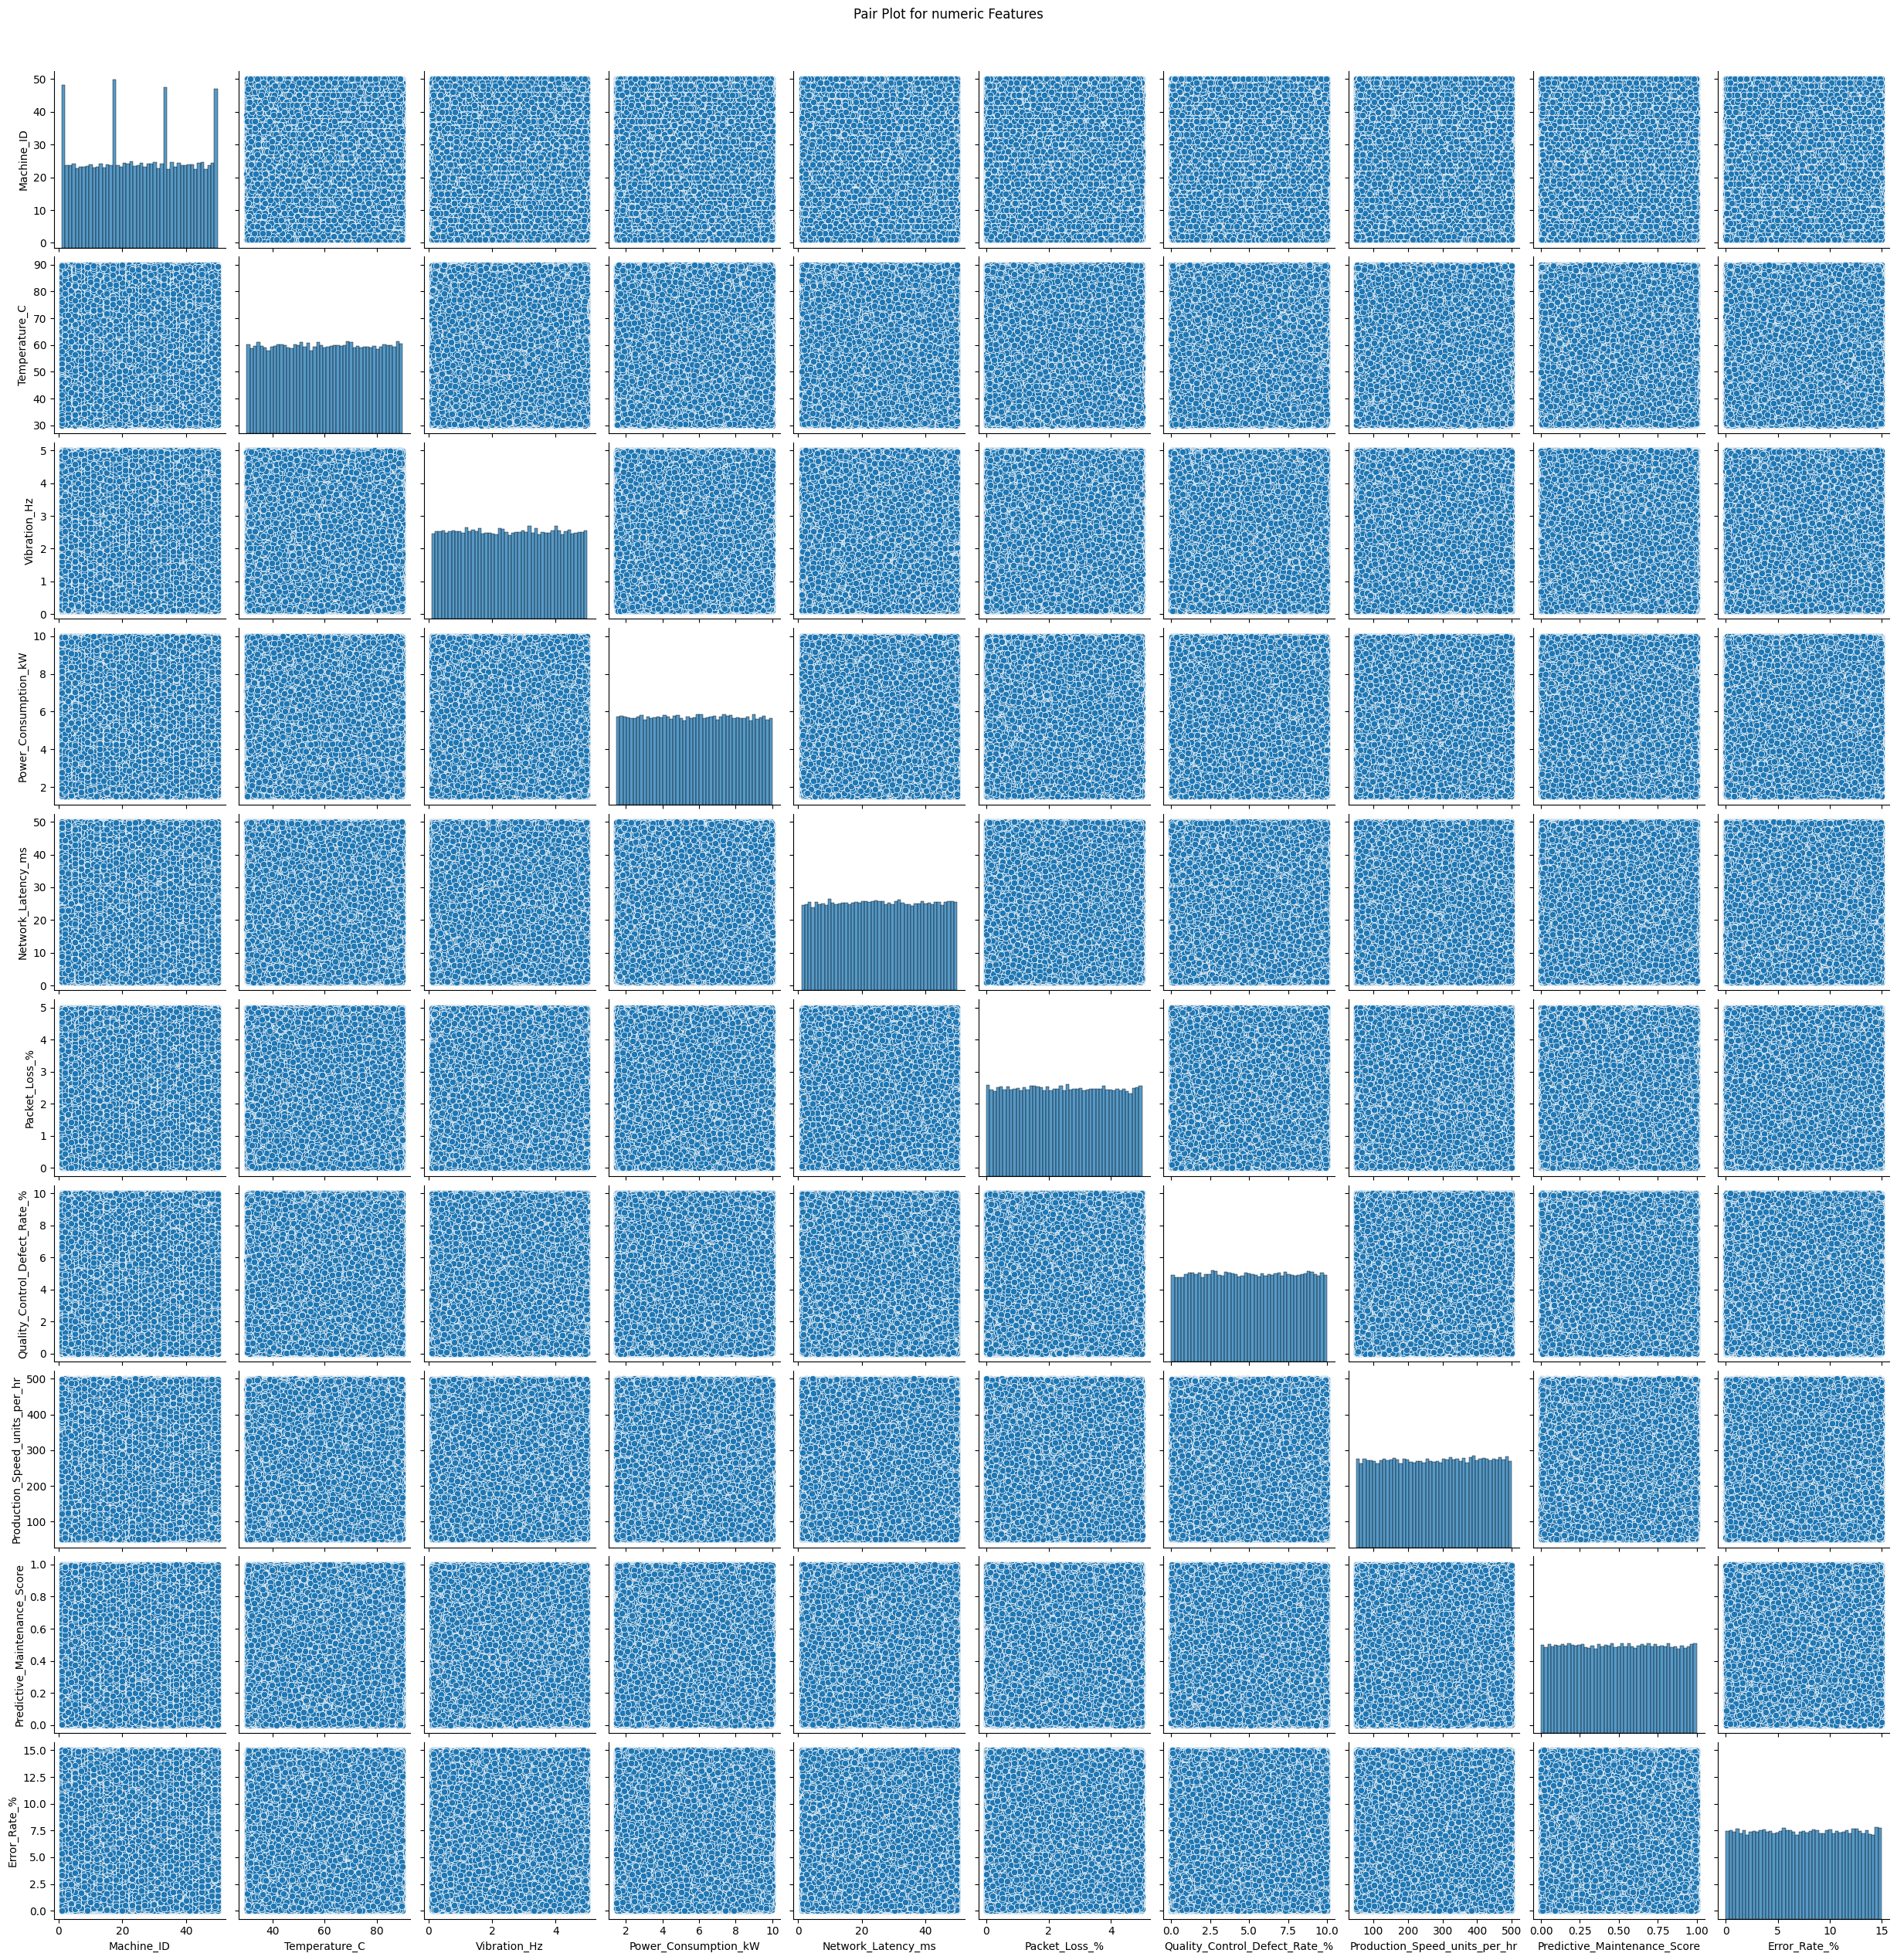

In [20]:
sns.pairplot(df[numeric_cols])
plt.suptitle("Pair Plot for numeric Features",y=1.02)
plt.show()

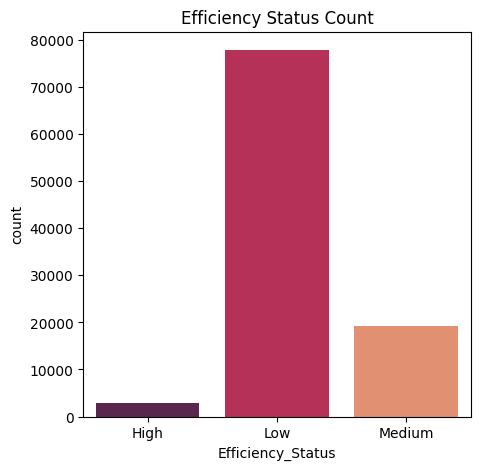

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x='Efficiency_Status',data=df,palette='rocket')
plt.title("Efficiency Status Count")
plt.show()

### Feature Engineering

In [25]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df["Day"] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

In [26]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  Vibration_Hz  \
0 2024-01-01 00:00:00          39           Idle      74.137590      3.500595   
1 2024-01-01 00:01:00          29         Active      84.264558      3.355928   
2 2024-01-01 00:02:00          15         Active      44.280102      2.079766   
3 2024-01-01 00:03:00          43         Active      40.568502      0.298238   
4 2024-01-01 00:04:00           8           Idle      75.063817      0.345810   

   Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0              8.612162           10.650542       0.207764   
1              2.268559           29.111810       2.228464   
2              6.144105           18.357292       1.639416   
3              4.067825           29.153629       1.161021   
4              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  Year  Month  \
0                      0.344650     14.965470               Low  2024      1   
1                      0.769848      7.678270               Low  2024      1   
2                      0.987086      8.198391               Low  2024      1   
3                      0.983390      2.740847            Medium  2024      1   
4                      0.573117     12.100686               Low  2024      1   

   Day  Hour  
0    1     0  
1    1     0  
2    1     0  
3    1     0  
4    1     0

In [27]:
df.drop(['Timestamp','Machine_ID'],axis=1,inplace=True)

In [28]:
df.head()

Operation_Mode  Temperature_C  Vibration_Hz  Power_Consumption_kW  \
0           Idle      74.137590      3.500595              8.612162   
1         Active      84.264558      3.355928              2.268559   
2         Active      44.280102      2.079766              6.144105   
3         Active      40.568502      0.298238              4.067825   
4           Idle      75.063817      0.345810              6.225737   

   Network_Latency_ms  Packet_Loss_%  Quality_Control_Defect_Rate_%  \
0           10.650542       0.207764                       7.751261   
1           29.111810       2.228464                       4.989172   
2           18.357292       1.639416                       0.456816   
3           29.153629       1.161021                       4.582974   
4           34.029191       4.796520                       2.287716   

   Production_Speed_units_per_hr  Predictive_Maintenance_Score  Error_Rate_%  \
0                     477.657391                      0.344650     14.965470   
1                     398.174747                      0.769848      7.678270   
2                     108.074959                      0.987086      8.198391   
3                     329.579410                      0.983390      2.740847   
4                     159.113525                      0.573117     12.100686   

  Efficiency_Status  Year  Month  Day  Hour  
0               Low  2024      1    1     0  
1               Low  2024      1    1     0  
2               Low  2024      1    1     0  
3            Medium  2024      1    1     0  
4               Low  2024      1    1     0

### Label Encoding

In [30]:
label_encoder = LabelEncoder()

df['Efficiency_Target'] = label_encoder.fit_transform(df['Efficiency_Status'])

In [38]:
df['Operation_Mode'] = label_encoder.fit_transform(df['Operation_Mode'])

In [39]:
df.head()

Operation_Mode  Temperature_C  Vibration_Hz  Power_Consumption_kW  \
0               1      74.137590      3.500595              8.612162   
1               0      84.264558      3.355928              2.268559   
2               0      44.280102      2.079766              6.144105   
3               0      40.568502      0.298238              4.067825   
4               1      75.063817      0.345810              6.225737   

   Network_Latency_ms  Packet_Loss_%  Quality_Control_Defect_Rate_%  \
0           10.650542       0.207764                       7.751261   
1           29.111810       2.228464                       4.989172   
2           18.357292       1.639416                       0.456816   
3           29.153629       1.161021                       4.582974   
4           34.029191       4.796520                       2.287716   

   Production_Speed_units_per_hr  Predictive_Maintenance_Score  Error_Rate_%  \
0                     477.657391                      0.344650     14.965470   
1                     398.174747                      0.769848      7.678270   
2                     108.074959                      0.987086      8.198391   
3                     329.579410                      0.983390      2.740847   
4                     159.113525                      0.573117     12.100686   

  Efficiency_Status  Year  Month  Day  Hour  Efficiency_Target  
0               Low  2024      1    1     0                  1  
1               Low  2024      1    1     0                  1  
2               Low  2024      1    1     0                  1  
3            Medium  2024      1    1     0                  2  
4               Low  2024      1    1     0                  1

In [40]:
df['Efficiency_Target'].value_counts()

Efficiency_Target
1    77825
2    19189
0     2986
Name: count, dtype: int64

In [41]:
X = df.drop(['Efficiency_Target','Efficiency_Status'],axis=1)
X.columns

Index(['Operation_Mode', 'Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [42]:
y = df['Efficiency_Target']

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [45]:
X_scaled

array([[ 0.90966411,  0.81371637,  0.6722461 , ..., -0.98913588,
        -1.47971264, -1.65455063],
       [-0.60228488,  1.39830797,  0.56994397, ..., -0.98913588,
        -1.47971264, -1.65455063],
       [-0.60228488, -0.90984353, -0.33249858, ..., -0.98913588,
        -1.47971264, -1.65455063],
       ...,
       [-0.60228488, -0.4180028 ,  0.0565851 , ...,  1.87958768,
        -0.46454206, -0.21046154],
       [-0.60228488,  1.15024065, -0.1881206 , ...,  1.87958768,
        -0.46454206, -0.21046154],
       [-0.60228488, -1.48487738, -1.69695704, ...,  1.87958768,
        -0.46454206, -0.21046154]], shape=(100000, 14))

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
clf = LogisticRegression(random_state=42,max_iter=1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [57]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred = clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,classification_report

In [53]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.9166

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       597
           1       0.95      0.96      0.95     15565
           2       0.80      0.76      0.78      3838

    accuracy                           0.92     20000
   macro avg       0.86      0.85      0.86     20000
weighted avg       0.92      0.92      0.92     20000



In [58]:
y_pred = RF.predict(X_test)

In [59]:
accuracy_score(y_pred=y_pred,y_true=y_test)

1.0

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       1.00      1.00      1.00     15565
           2       1.00      1.00      1.00      3838

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [62]:
DT = DecisionTreeClassifier()

In [63]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred = DT.predict(X_test)

In [65]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.99985

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       1.00      1.00      1.00     15565
           2       1.00      1.00      1.00      3838

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [67]:
DT.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.41270664, 0.        , 0.58729336,
       0.        , 0.        , 0.        , 0.        ])

In [68]:
X.columns

Index(['Operation_Mode', 'Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [69]:
from sklearn.inspection import permutation_importance

In [70]:
result = permutation_importance(clf,X_test,y_test,n_repeats=10,random_state=42,n_jobs=-1)

In [72]:
importance_df = pd.DataFrame({
    'Feature':X.columns,
    'importance' :result.importances_mean # type: ignore
})

In [73]:
importance_df

Feature  importance
0                  Operation_Mode   -0.000055
1                   Temperature_C    0.000265
2                    Vibration_Hz    0.000055
3            Power_Consumption_kW    0.000350
4              Network_Latency_ms    0.000290
5                   Packet_Loss_%   -0.000085
6   Quality_Control_Defect_Rate_%    0.000295
7   Production_Speed_units_per_hr    0.117785
8    Predictive_Maintenance_Score   -0.000070
9                    Error_Rate_%    0.235010
10                           Year    0.000000
11                          Month   -0.000255
12                            Day    0.000065
13                           Hour    0.000160

In [75]:
importance_df.sort_values(by='importance',ascending=False)

Feature  importance
9                    Error_Rate_%    0.235010
7   Production_Speed_units_per_hr    0.117785
3            Power_Consumption_kW    0.000350
6   Quality_Control_Defect_Rate_%    0.000295
4              Network_Latency_ms    0.000290
1                   Temperature_C    0.000265
13                           Hour    0.000160
12                            Day    0.000065
2                    Vibration_Hz    0.000055
10                           Year    0.000000
0                  Operation_Mode   -0.000055
8    Predictive_Maintenance_Score   -0.000070
5                   Packet_Loss_%   -0.000085
11                          Month   -0.000255